In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
file_path = '/content/SSL.csv'
data = pd.read_csv(file_path)

In [5]:
# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   THUMB_MCP_angle  INDEX_MCP_angle  MIDDLE_MCP_angle  RING_MCP_angle  \
0       158.850393       166.191120        171.312416      164.417307   
1       179.764919       162.918659        164.688354      158.761507   
2       163.686400       156.874601        168.731120      167.597585   
3       164.877336       157.923103        168.825020      166.714988   
4       162.510311       155.772163        167.382585      167.906615   

   PINKY_MCP_angle  INDEX_PIP_angle  MIDDLE_PIP_angle  RING_PIP_angle  \
0       152.776481       166.274985        168.753093      170.136228   
1       150.168779       165.712954        165.773444      173.676437   
2       155.271677       170.371422        173.189007      178.279313   
3       154.694918       171.259425        173.170858      177.966303   
4       151.483203       164.876201        167.474186      171.706166   

   PINKY_PIP_angle  INDEX_DIP_angle  MIDDLE_DIP_angle  RING_DIP_angle  \
0       170.599224

In [ ]:
# Check for missing values and handle them
if data.isnull().sum().sum() > 0:
    print("Missing values detected. Filling with mean values...")
    data.fillna(data.mean(), inplace=True)
else:
    print("No missing values detected.")

No missing values detected.


In [11]:
# Separate features and labels
if 'LABEL' in data.columns:
    features = data.drop(columns=['LABEL'])  # Assuming the 'label' column represents the target variable
    labels = data['LABEL']
    print("Features and labels separated successfully.")
else:
    raise KeyError("'label' column not found in the dataset. Please ensure the file contains a 'label' column.")

Features and labels separated successfully.


In [12]:
# Standardize the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)
print("Features standardized successfully.")

Features standardized successfully.


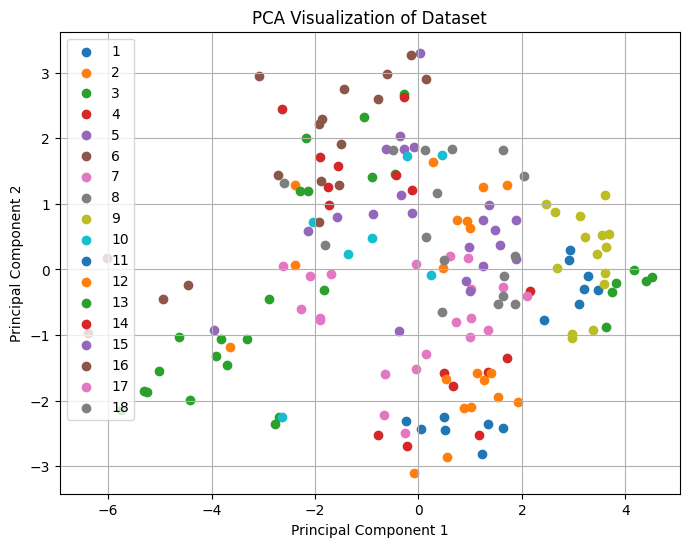

In [20]:
# Visualize the principal components
plt.figure(figsize=(8, 6))
for label in pca_df['label'].unique():
    subset = pca_df[pca_df['label'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label)
plt.title('PCA Visualization of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

In [21]:
# Perform PCA with all 16 components
pca = PCA(n_components=16)
pca_components = pca.fit_transform(standardized_features)

In [22]:
# Explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio for each component:")
for i, variance in enumerate(explained_variance_ratio):
    print(f"Component {i + 1}: {variance:.4f} ({variance * 100:.2f}%)")

Explained Variance Ratio for each component:
Component 1: 0.3398 (33.98%)
Component 2: 0.1363 (13.63%)
Component 3: 0.1276 (12.76%)
Component 4: 0.1045 (10.45%)
Component 5: 0.0670 (6.70%)
Component 6: 0.0463 (4.63%)
Component 7: 0.0418 (4.18%)
Component 8: 0.0307 (3.07%)
Component 9: 0.0287 (2.87%)
Component 10: 0.0220 (2.20%)
Component 11: 0.0185 (1.85%)
Component 12: 0.0155 (1.55%)
Component 13: 0.0103 (1.03%)
Component 14: 0.0054 (0.54%)
Component 15: 0.0036 (0.36%)
Component 16: 0.0020 (0.20%)


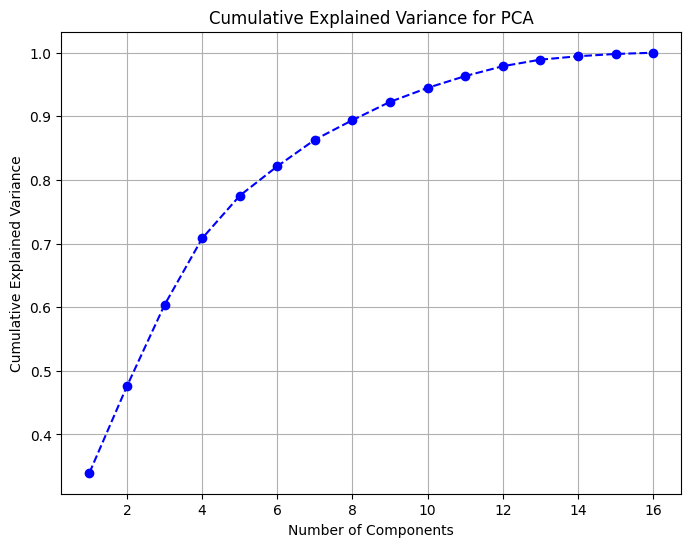

In [23]:
# Plot cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance for PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [24]:
# Save PCA-transformed data for inspection (optional)
pca_df = pd.DataFrame(data=pca_components, columns=[f'PC{i + 1}' for i in range(pca_components.shape[1])])
pca_df['label'] = labels
pca_df.to_csv('PCA_results.csv', index=False)
print("PCA results saved to 'PCA_results.csv'.")

PCA results saved to 'PCA_results.csv'.
